# Solving MDPs using Value Iteration

## Recap

- MDPs are a mathematical framework for modeling *Decision Making Under Transition Uncertainty*.

- MDPs are a 5-tuple $\langle \mathcal{S},\mathcal{A}, \mathcal{T}, \mathcal{R}, \gamma \rangle$.


- The solution to an MDP is an optimal policy $\pi^*$ that maximises the sum of (discounted future) rewards.

<!-- - Mathematically, 

    $$\pi^* = \argmax_{\pi} \sum_{t=0}^{t_H-1} \Big [ \gamma^t R_t | \pi \Big ] -->

## Solution schemes

### Core idea

- Compute the "value" / "usefulness" of each state.

- Choose actions that take us to most valuable states.

Two approaches: **Planning** and **Learning**

### Planning

We can use the transition model $\mathcal{T}$ and reward model $\mathcal{R}$ to *plan* our actions in the environment.

1. **Dynamic Programming**

    1.1. Value Iteration
    
    1.2. Policy Iteration

2. **Linear Programming**

### Learning

- However, in many practical problems, the underlying transition and reward models are not explicitly available. 

- But we can collect experience (trial and error) in the environment using which we can *learn* the optimal policy.


- **Reinforcement Learning**


## Return


Recall, that the MDP is a sequence,

$$s_0, a_0, r_1, s_1, a_1, r_2, s_2, a_2, r_3, \ldots$$ 



and we want to maxmise the rewards we collect.

In general, the total rewards collected starting at time $t$ is called the return,

$$G_t := R_{t} + \gamma R_{t+1} + \gamma^2 R_{t+2} + \ldots , $$

where $\gamma$ is the discount factor.



It can also be defined recursively, 

$$G_t := R_{t} + \gamma \Big [ R_{t+1} + \gamma R_{t+2} + \ldots \Big ]$$

$$G_t = R_{t} + \gamma G_{t+1}$$

## Example


Consider the following reward sequence,

$$0, 6, 7, 4, 8, 1$$

and assume a discount factor of $\gamma=0.9$.


$G_6 = R_6 = 1$

$G_5 = R_5 + \gamma R_6 = 8 + 0.9 \cdot 1 = 8.9$

*verify the recursively relationship we defined previously*

How an you write $G_4$ in terms of $G_5$ and $R_4$?

# Optimal Values

- The optimal value of a state $s$ is the expected sum of (discounted) future rewards, when taking optimal action in state $s$ and following $\pi^*$ thereafter. 

- Intuitively, it tells us "*the best return in a particular state*".

- Mathematically, we define the optimal value function $V_{\pi^*}(s)$ as,

$$V_{\pi^*}(s) := \mathbb{E}_{\pi^*} \big [ G_t | S_t = s \big ], \quad \forall s \in \mathcal{S}$$

### Example: Frozen Lake

Recall that our environment is a 4x4 grid and looks like this

<div align="center"> 
<img src="images/FrozenLake-v1.png"  width="40%"/>
</div>

Optimal values in the Frozen Lake example, with discount factor $\gamma = 0.9$.

$V_{\pi^*}(s) = \mathbb{E}_{\pi^*} \big [ G_t | S_t = s \big ], \quad \forall s \in \mathcal{S}$.

Key idea: *Given a number of states to choose from, it is most beneficial to move to a state with the highest value.*

<div align="center"> 
<img src="images/value_on_map.png"  width="40%"/>
</div>

# Optimal Action-values

Similarly, we define the optimal action-value function $Q_{\pi^*}(s, a)$ as,

$$Q_{\pi^*}(s, a) := \mathbb{E}_{\pi^*} \big [ G_t | S_t = s, A_t = a \big ], \quad \forall s \in \mathcal{S} \quad \& \quad \forall a \in \mathcal{A}$$

Intuitively, it is the expected return when starting in state $s$ and taking action $a$ and following policy $\pi^*$ thereafter.

## Bellman Optimality Equation

The Bellman optimality equation is given as follows, 

$$Q_{*}(s,a) = \sum_{s'} \mathcal{T}(s' | s, a) \big [\mathcal{R}(s,a,s') + \gamma \cdot V_{*}(s') \big ],$$

$$V_{*}(s) = \max_a Q_{*}(s,a).$$

where, $\mathcal{T}(s' | s, a)$ is the transition model and $\mathcal{R}(s,a,s')$ is the reward model.

We combine the two equations above,

$$V_{*}(s) = \max_a \sum_{s'} \mathcal{T}(s' | s, a) \big [\mathcal{R}(s,a,s') + \gamma \cdot V_{*}(s') \big ].$$

### Example Calculation

Using the Bellman equation, we demonstrate how the value of state $\mathtt{s^{14}} = (2, 3)$ is $0.9$:

<div align="center"> 
<img src="images/value_on_map.png"  width="30%"/>
</div>

- Since we have $4$ actions, each state has $4$ Q values. 

$
\begin{equation}
\begin{split}
Q_{*}(\mathtt{s^{14}}, \text{Left}) & = \mathcal{T}(s'= \mathtt{s^{13}}| s=\mathtt{s^{14}}, a=\text{Left}) \cdot [ \mathcal{R}(\mathtt{s^{14}}) + 0.9 \cdot V_{*}(\mathtt{s^{13}}) ] \\
& = 1 \cdot [ 0 + 0.9 \cdot 0.81 ] = 0.729
\end{split}
\end{equation}
$

- $Q_{*}(\mathtt{s^{14}}, \text{Left}) = 0.729$ 

Similarly,

- $Q_{*}(\mathtt{s^{14}}, \text{Down}) = 0 + 0.9 \cdot 0.9 = 0.81$, 

- $Q_{*}(\mathtt{s^{14}}, \text{Right}) = 0 + 0.9 \cdot 1 = 0.9$,

- $Q_{*}(\mathtt{s^{14}}, \text{Up}) = 0 + 0.9 \cdot 0.81 = 0.729$.

And $V_{*}(s^{14})$ is simply the maximum among these values, thus $V_{*}(s^{14}) = 0.9$.

# Value Iteration

- The goal of value iteration is to determine the optimal value of each state. 

- Once we have determined the optimal value of each state, we can obtain the optimal policy simply by acting greedily with respect to these values.

##### Note (for advanced readers):

We are currently limiting our discussion to MDPs with deterministic transition and reward models, i.e. models with deterministic outputs.

However, dynamic programming can be extended to MDPs with stochastic transition and reward models, i.e. outputs of these models are random and is called **stochastic** dynamic programming.

- Recall the Bellman optimality equation,

$$V_{*}(s) = \max_a \sum_{s'} \mathcal{T}(s' | s, a) \big [\mathcal{R}(s,a,s') + \gamma \cdot V_{*}(s') \big ].$$

- Value iterations converts it into an update equation.

- Get new estimate $V_{k+1}(s)$ using current estimate $V_{k}(s)$.

$$V_{k+1}(s) \leftarrow \max_a \sum_{s'} \mathcal{T}(s' | s, a) \big [\mathcal{R}(s,a,s') + \gamma \cdot V_{k}(s') \big ],$$

- Value iteration is a dynamic programming approach that iteratively improves the estimate of the values of the states $V(s)$. 

- We essentially work our way backwards from the reward states / terminal states in order to determine the value of each state.

<div align="center"> 
<img src="images/value_iteration.png"  width="100%"/>
</div>

## Value Iteration

The algorithm can be summarised as follows:

Initialisations: Values of states, accuracy threshold

while error > accuracy threshold:

    Loop over all states s in S:
        old value = current value estimate of state (s)

        Loop over all actions a in A:
            compute Q(s, a)

        V(s) = max Q(s, a)

        compute error: |old value - V(s)|

In [1]:
import copy, math

import numpy as np
from frozen_lake import FrozenLake

import matplotlib.pyplot as plt
import seaborn as sns
from utils import plot_policy, plot_values, format_plot

## Initialise Environment

In [2]:
# env = FrozenLake()
env = FrozenLake(prob_slip=0.1)

num_states = env.observation_space.n
num_actions = env.action_space.n
DISCOUNT_FACTOR = 0.9

In [3]:
# Initialisations
q_function = np.zeros((num_states, num_actions))
value_function = np.zeros(num_states)

store_each_iteration = []

accuracy_threshold = 1e-4
error = 10

In [4]:
# Fixed point iteration
while error > accuracy_threshold:
    error = 0

    # store each iteration for plotting
    # (optional)
    store_each_iteration.append(copy.deepcopy(value_function))

    # loop over all states
    for state in range(num_states):
        old_value = value_function[state]

        # loop over all actions
        # Compute Q values of all actions
        for action in range(num_actions):
            q_val = 0
            tuples = env.MDP(state, action)
            for _tuple in tuples:
                prob, next_state, reward, done = _tuple
                # Q_(k+1)(s,a) = ∑ T(s'|s,a) [R(s) + V_k(s')]
                future_value = value_function[next_state] * int(1 - done) # set future values of done states to 0
                q_val += prob * (reward + DISCOUNT_FACTOR * future_value)
            q_function[state, action] = q_val

        # value_function[state] = max(q_values)
        value_function[state] = max(q_function[state])

        # termination condition
        # check difference between old and new value
        new_value = value_function[state]
        error = max([error, np.abs(old_value - new_value)])

## Compute Optimal Policy

In [5]:
optimal_policy = {}
for state in range(num_states):
    optimal_policy[state] = [0, 1, 2, 3]
    
for state in range(num_states):
    # get all indices with max value
    optimal_actions = np.flatnonzero(q_function[state] == max(q_function[state]))
    optimal_policy[state] = optimal_actions

## Plots

Here we plot the value of each state after every iteration. Notice that the values propagate backwards from the reward states and the terminal states.

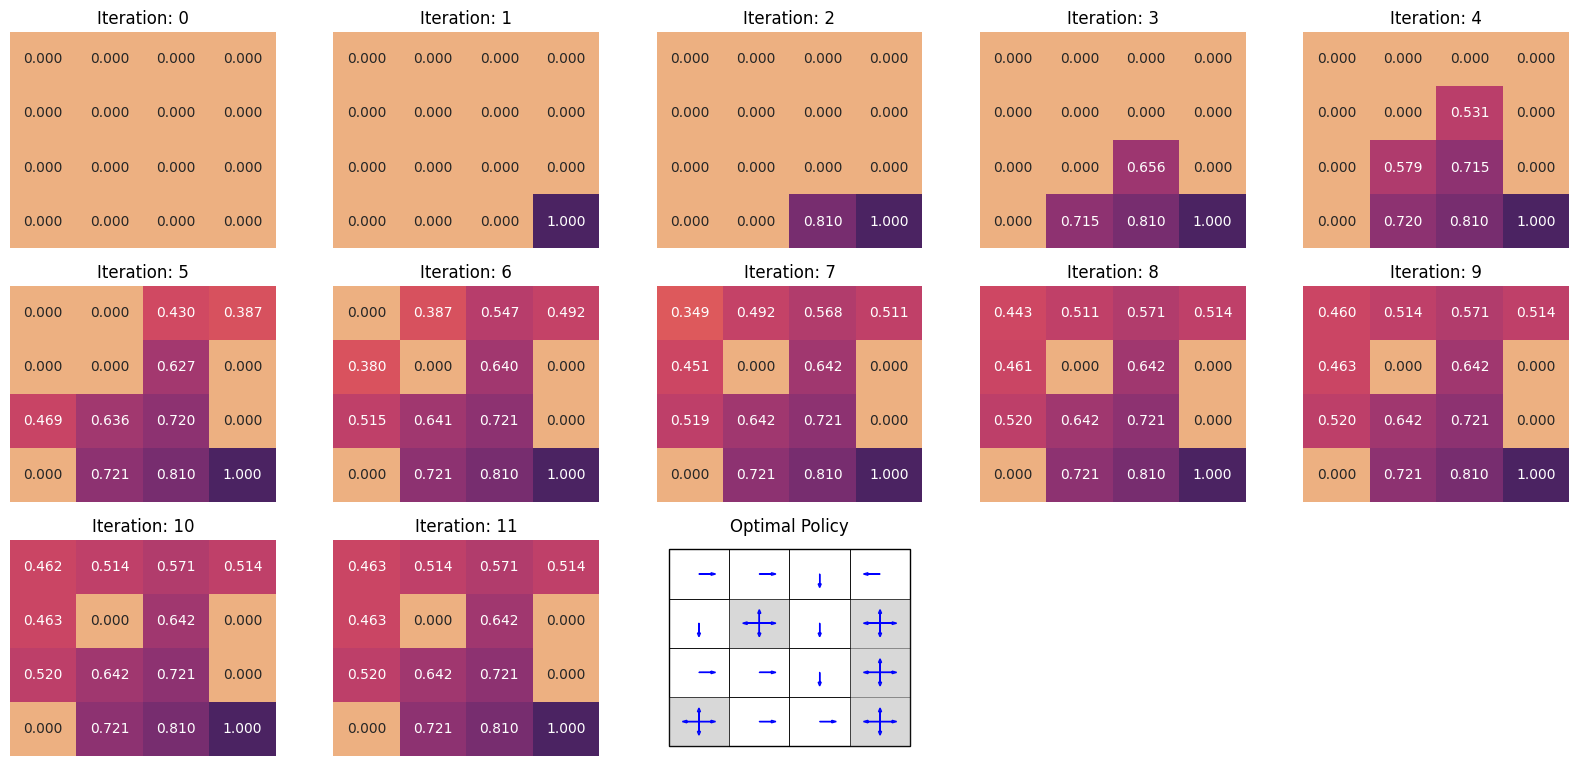

In [6]:
sns.color_palette("colorblind")

num_plots = len(store_each_iteration)

n_col_plot = 5
n_row_plot = math.ceil(num_plots/n_col_plot)

fig, ax = plt.subplots(n_row_plot, n_col_plot, figsize=(16, 8))

for k, values in enumerate(store_each_iteration):

    # select axis in the plot
    _row = k//n_col_plot
    _col = k%n_col_plot
    ax1 = ax[_row, _col]

    plot_values(ax1, values)

    ax1.set_title(f'Iteration: {k}')

    format_plot(ax1)
    
plot_policy(ax[_row][_col+1], optimal_policy)
ax[_row][_col+1].set_title(f'Optimal Policy')
format_plot(ax[_row][_col+1])

fig.tight_layout()

# remove unused axis
_to_delete = n_col_plot - num_plots % 5 - 1
for p in range(_to_delete):
    fig.delaxes(ax[_row][-1-p])

## Optimal Policy

Optimal policy prescribes the best action to take in each state.

In [7]:
print('       Optimal Policy     ')
print('----------------------------')

for state in range(num_states):
    action = optimal_policy[state]
    print(f'State: {state+1:2} |  π*({state}) = {action}')

       Optimal Policy     
----------------------------
State:  1 |  π*(0) = [2]
State:  2 |  π*(1) = [2]
State:  3 |  π*(2) = [1]
State:  4 |  π*(3) = [0]
State:  5 |  π*(4) = [1]
State:  6 |  π*(5) = [0 1 2 3]
State:  7 |  π*(6) = [1]
State:  8 |  π*(7) = [0 1 2 3]
State:  9 |  π*(8) = [2]
State: 10 |  π*(9) = [2]
State: 11 |  π*(10) = [1]
State: 12 |  π*(11) = [0 1 2 3]
State: 13 |  π*(12) = [0 1 2 3]
State: 14 |  π*(13) = [2]
State: 15 |  π*(14) = [2]
State: 16 |  π*(15) = [0 1 2 3]


### Quiz

- What happens when you change the DISCOUNT_FACTOR to $0$? Why?

- What happens when you change the DISCOUNT_FACTOR to $1$? Why?

- Do both changes have the same effect?

### Takeaways

- To solve the MDP, we focus on computing the optimal values of states.

- The optimal policy can be obtained simply by acting greedily wrt optimal values.

- $V_{*}(s) = \max_a \sum_{s'} \mathcal{T}(s' | s, a) \big [\mathcal{R}(s) + \gamma \cdot V_{*}(s') \big ]$

- Value iteration converts the Bellman optimality into an iterative update.

- In order to update the values of states, dynamic programming proceeds backwards (backward induction) from the reward states/terminal state and updates the value of each state in every iteration until it converges.

You can view another example [here](https://cs.stanford.edu/people/karpathy/reinforcejs/gridworld_dp.html) by Andrej Karpathy 

# References


Brockman, G.. OpenAI Gym. arXiv (2016). https://arxiv.org/pdf/1606.01540.pdf

Richard S. Sutton & Andrew G. Barto. Reinforcement learning : an introduction. (2020)